¡Hola, Constanza!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto: Buenas tardes Tonatiuh. Muchas gracias por las recomendaciones que me hiciste, no me había quedado claro que debía realizar este análisis para unas características muy específicas como el filtrado por regio por la prueba. Con los cambios que apliqué, considero que ya está más acorde a lo requerido en este proyecto. Quedo atenta a tus nuevos comentario o a la aprovación para continuar con la siguiente tarea de este proyecto final.


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Constanza! Has hecho un excelente trabajo al realizar con el desarrollo del proyecto, realizas un tratamiento inicial a los datos, el filtro de estos y las pruebas indicadas. Solamente te dejo algunos comentarios para terminar de complementar el análisis

Sigue con el excelente trabajo!
</div>

# **PROYECTO SPRINT 14: PRUEBAS A/B**

Has recibido una tarea analítica de una tienda en línea internacional. Tus predecesores no consiguieron completarla: lanzaron una prueba A/B y luego abandonaron (para iniciar una granja de sandías en Brasil). Solo dejaron las especificaciones técnicas y los resultados de las pruebas.

### **Descripción técnica**
- Nombre de la prueba: recommender_system_test
- Grupos: А (control), B (nuevo embudo de pago)
- Fecha de lanzamiento: 2020-12-07
- Fecha en la que dejaron de aceptar nuevos usuarios: 2020-12-21
- Fecha de finalización: 2021-01-01
- Audiencia: 15% de los nuevos usuarios de la región de la UE
- Propósito de la prueba: probar cambios relacionados con la introducción de un sistema de recomendaciones mejorado
- Resultado esperado: dentro de los 14 días posteriores a la inscripción, los usuarios mostrarán una mejor conversión en vistas de la página del producto (el evento product_page), instancias de agregar artículos al carrito de compras (product_cart) y compras (purchase). En cada etapa del embudo product_page → product_cart → purchase, habrá al menos un 10% de aumento.
- Número previsto de participantes de la prueba: 6 000

Descarga los datos de la prueba, comprueba si se ha realizado correctamente y analiza los resultados.

### **Descripción de los datos**

Descarga los datasets de Notion.

Para acceder a los datasets de la plataforma, agrega /datasets/ al principio de la ruta del archivo (por ejemplo, /datasets/ab_project_marketing_events_us.csv).

- ab_project_marketing_events_us.csv — el calendario de eventos de marketing para 2020
- final_ab_new_users_upd_us.csv — todos los usuarios que se registraron en la tienda en línea desde el 7 hasta el 21 de diciembre de 2020
- final_ab_events_upd_us.csv — todos los eventos de los nuevos usuarios en el período comprendido entre el 7 de diciembre de 2020 y el 1 de enero de 2021
- final_ab_participants_upd_us.csv — tabla con los datos de los participantes de la prueba

**1. Estructura ab_project__marketing_events_us.csv:**
- name — el nombre del evento de marketing
- regions — regiones donde se llevará a cabo la campaña publicitaria
- start_dt — fecha de inicio de la campaña
- finish_dt — fecha de finalización de la campaña

**2. Estructura final_ab_new_users_upd_us.csv:**
- user_id
- first_date — fecha de inscripción
- region
- device — dispositivo utilizado para la inscripción

**3. Estructura final_ab_events_upd_us.csv:**
- user_id
- event_dt — fecha y hora del evento
- event_name — nombre del tipo de evento
- details — datos adicionales sobre el evento (por ejemplo, el pedido total en USD para los eventos purchase)

**4. Estructura final_ab_participants_upd_us.csv:**
- user_id
- ab_test — nombre de la prueba
- group — el grupo de prueba al que pertenecía el usuario


### **Instrucciones para completar la tarea**

## **Paso 1. Describir el objetivo del estudio**

El objetivo principal de esta Prueba A/B, es analizar los resultados de la prueba recommender_system_test donde A (control) y B (nuevo embudo de pago), para determinar si las nuevas recomendaciones han logrado el resultado que se espera: aumento en las tasas de conversión en las etapas del embudo product_page → product_card → purchase.

## **Paso 2. Explorar los Datos**

#### **2.1. ¿Es necesario convertir los tipos?**

In [1]:
# Importar librerías

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import datetime as dt
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# Leer los datos

marketing = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')

users = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')

events = pd.read_csv('/datasets/final_ab_events_upd_us.csv')

participants = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

##### **2.1.1. Marketing**

In [3]:
# Analizar tipos de datos del DataFrame 'marketing'

marketing.info()

marketing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [4]:
# Cambiar el tipo de datos de las columnas 'start_dt' y 'finish_dt'

marketing['start_dt'] = pd.to_datetime(marketing['start_dt'], format='%Y-%m-%d %H:%M:%S')

marketing['finish_dt'] = pd.to_datetime(marketing['finish_dt'], format='%Y-%m-%d %H:%M:%S')

marketing.info()

marketing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


##### **2.1.2. Users**

In [5]:
# Analizar tipos de datos del DataFrame 'marketing'

users.info()

users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [6]:
# Cambiar el tipo de datos de la columna 'first_date'

users['first_date'] = pd.to_datetime(users['first_date'], format='%Y-%m-%d %H:%M:%S')

users.info()

users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


##### **2.1.3. Events**

In [7]:
# Analizar tipos de datos del DataFrame 'marketing'

events.info()

events.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [8]:
# Cambiar el tipo de datos de la columna 'event_dt'

events['event_dt'] = pd.to_datetime(events['event_dt'], format='%Y-%m-%d %H:%M:%S')

events.info()

events.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


##### **2.1.4. Participants**

In [9]:
# Analizar tipos de datos del DataFrame 'marketing'

participants.info()

participants.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


Fue necesario realizar convertir los tipos de datos de las fechas al tipo de datos dataframe de las siguientes columnas:

1. 'start_dt' y 'finish_dt' del DataFrame 'marketing'
2. 'first_date' del DataFrame 'users'
3. 'event_dt' del DataFrame 'events'

En el DataFrame 'participants' no fue necesario realizar tipo de cambio a ni nguna columna.

<div class="alert alert-block alert-success">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Constanza, muy buen trabajo con la conversión de los tipos de datos, así como la extracción de la fecha y hora

Además, más adelante eliminar registros duplicados es esencial en el análisis de datos para evitar que sesguen nuestros resultados.
</div>

### **2.2. ¿Hay valores ausentes o duplicados? Si es así, ¿cómo los caracterizarías?**

##### **2.2.1. Marketing**

In [10]:
# Encontrar los valores ausentes en el DataFrame 'marketing'

print('Valores ausentes del DataFrame marketing:', '\n',marketing.isnull().sum())

Valores ausentes del DataFrame marketing: 
 name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64


In [11]:
# Encontrar los valores duplicados en el DataFrame 'marketing'

print('Valores duplicados del DataFrame marketing:',marketing.duplicated().sum())

Valores duplicados del DataFrame marketing: 0


##### **2.2.2. Users**

In [12]:
# Encontrar los valores ausentes en el DataFrame 'users'

print('Valores ausentes del DataFrame users:', '\n',users.isnull().sum())

Valores ausentes del DataFrame users: 
 user_id       0
first_date    0
region        0
device        0
dtype: int64


In [13]:
# Encontrar los valores duplicados en el DataFrame 'users'

print('Valores duplicados del DataFrame users:',users.duplicated().sum())

Valores duplicados del DataFrame users: 0


##### **2.2.3. Events**

In [14]:
# Encontrar los valores ausentes en el DataFrame 'events'

print('Valores ausentes del DataFrame events:', '\n',events.isnull().sum())

Valores ausentes del DataFrame events: 
 user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64


In [15]:
# Filtrar el DataFrame para ver los eventos donde 'details' es nulo
events_nulls = events[events['details'].isnull()]

# Contar la cantidad de 'event_name' para esos eventos
print(events_nulls['event_name'].value_counts())
print()

login           182465
product_page    120862
product_cart     60120
Name: event_name, dtype: int64



In [16]:
# Encontrar los valores duplicados en el DataFrame 'events'

print('Valores duplicados del DataFrame events:',events.duplicated().sum())
print()

Valores duplicados del DataFrame events: 0



La columna 'details' muestra que tiene 363,447 valores ausentes. Del método info() se obtuvieron 60,314 valores no ausentes. Eso quiere decir que del total de filas para la columna 'details' la mayoría de valores son valores ausentes.

Esta columna contiene datos adicionales sobre el evento (por ejemplo, el pedido total en USD para los eventos purchase).

Analizando todo el contexto de estos datos y la influencia en este análisis se puede decir que los valores no ausentes corresponden a los valores relacionados con el evento purchase. Para los demás eventos como login, product_page, product_cart esta columna presenta valores ausentes, esto puede ser un comportamiento esperado.

En este caso considero que lo más adecuado es no procesar estos valores ausentes y dejarlos tal cuál están, debido a que los valores ausentes corresponden exclusivamente a los eventos que no son purchase. Esto es un comportamiento esperado, ya que la columna details solo contiene datos sobre el valor de la compra para los eventos de purchase. 

##### **2.2.4. Participants**

In [17]:
# Encontrar los valores ausentes en el DataFrame 'participants'

print('Valores ausentes del DataFrame participants:', '\n',participants.isnull().sum())

Valores ausentes del DataFrame participants: 
 user_id    0
group      0
ab_test    0
dtype: int64


In [18]:
# Encontrar los valores duplicados en el DataFrame 'participants'

print('Valores duplicados del DataFrame participants:', participants.duplicated().sum())

Valores duplicados del DataFrame participants: 0


<div class="alert alert-block alert-danger">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Constanza, excelente trabajo, Solamente antes de proceder con el análisi debemos de realizar los siguientes filtros que nos mencionan en el proyecto:
    
    - Agregar un filtro de los eventos de marketing aplicables a la region "UE", dado que con base en el ejercicio son los eventos de análisis.
    - verificar que las fechas de aplicación corresponden con lo que indica el ejercicio (fechas entre 2020-12-07 y 2021-01-01)
    - Filtrar los eventos relevante para el análisis
    - Verificar que consideramos los primeros 14 días desde que se registraron los usuarios
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

Exceptuando los valores ausentes de la columna 'details' del DataFrame 'events' (evento purchase con los valores no nulls), los demaás Dataframe 'marketing', 'users' y 'participants' no tiene  valores ausentes ni valores duplicados.

## **Aplicando las observaciones del revisor**

#### 1. Agregar un filtro de los eventos de marketing aplicables a la region "UE", dado que con base en el ejercicio son los eventos de análisis.

In [19]:
# Unir los DataFrame  'users' y 'events'

users_events = users.merge(events, on='user_id', how='inner')

users_events.head()

,user_id,first_date,region,device,event_dt,event_name,details
0,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07 21:52:10,product_page,NaN
1,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07 21:52:07,login,NaN
2,F1C668619DFE6E65,2020-12-07,N.America,Android,2020-12-07 16:38:09,product_page,NaN
3,F1C668619DFE6E65,2020-12-07,N.America,Android,2020-12-08 02:02:34,product_page,NaN
4,F1C668619DFE6E65,2020-12-07,N.America,Android,2020-12-23 14:35:41,product_page,NaN


In [20]:
# Filtra el DataFrame 'users_events' para la región EU'

users_events_eu = users_events[users_events['region'] == 'EU']

users_events_eu.head()

,user_id,first_date,region,device,event_dt,event_name,details
0,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07 21:52:10,product_page,NaN
1,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07 21:52:07,login,NaN
8,2E1BF1D4C37EA01F,2020-12-07,EU,PC,2020-12-07 09:05:47,product_cart,NaN
9,2E1BF1D4C37EA01F,2020-12-07,EU,PC,2020-12-10 04:13:53,product_cart,NaN
10,2E1BF1D4C37EA01F,2020-12-07,EU,PC,2020-12-12 17:54:57,product_cart,NaN


In [21]:
# Unir los DataFrame 'users_events_eu' y 'participants'

events_part_eu = users_events_eu.merge(participants, on='user_id', how='inner')

events_part_eu

,user_id,first_date,region,device,event_dt,event_name,details,group,ab_test
0,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07 21:52:10,product_page,NaN,A,recommender_system_test
1,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07 21:52:07,login,NaN,A,recommender_system_test
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC,2020-12-07 09:05:47,product_cart,NaN,A,interface_eu_test
3,2E1BF1D4C37EA01F,2020-12-07,EU,PC,2020-12-10 04:13:53,product_cart,NaN,A,interface_eu_test
4,2E1BF1D4C37EA01F,2020-12-07,EU,PC,2020-12-12 17:54:57,product_cart,NaN,A,interface_eu_test
...,...,...,...,...,...,...,...,...,...
101598,1C7D23927835213F,2020-12-20,EU,iPhone,2020-12-27 03:51:36,product_page,NaN,B,interface_eu_test
101599,1C7D23927835213F,2020-12-20,EU,iPhone,2020-12-20 14:14:28,login,NaN,B,interface_eu_test
101600,1C7D23927835213F,2020-12-20,EU,iPhone,2020-12-21 04:31:15,login,NaN,B,interface_eu_test
101601,1C7D23927835213F,2020-12-20,EU,iPhone,2020-12-23 15:47:23,login,NaN,B,interface_eu_test


Se obtuvo el DataFrame 'events_part_eu' después de realizar la unión entre la tablas 'users' y 'events'. La tabla resultante 'users_events' se filtró por región para tener las activades de los eventos de Europa 'EU'DataFrame 'events_part_eu'. Esta tabla está conformada por 101,603 filas y contienen todas las pruebas realizadas para Europa.

#### 2.  Verificar que las fechas de aplicación corresponden con lo que indica el ejercicio (fechas entre 2020-12-07 y 2021-01-01)

In [22]:
# Filtrar el DataFrame 'events_part_eu_test' por la prueba 'recommender_system_test' de la columna 'ab_test'

events_part_eu_test = events_part_eu[events_part_eu['ab_test'] == 'recommender_system_test']

events_part_eu_test

,user_id,first_date,region,device,event_dt,event_name,details,group,ab_test
0,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07 21:52:10,product_page,NaN,A,recommender_system_test
1,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07 21:52:07,login,NaN,A,recommender_system_test
42,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-07 15:32:54,product_page,NaN,B,recommender_system_test
44,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-08 08:29:31,product_page,NaN,B,recommender_system_test
46,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-10 18:18:27,product_page,NaN,B,recommender_system_test
...,...,...,...,...,...,...,...,...,...
101572,0416B34D35C8C8B8,2020-12-20,EU,Android,2020-12-21 22:28:29,product_page,NaN,A,recommender_system_test
101573,0416B34D35C8C8B8,2020-12-20,EU,Android,2020-12-24 09:12:51,product_page,NaN,A,recommender_system_test
101574,0416B34D35C8C8B8,2020-12-20,EU,Android,2020-12-20 20:58:25,login,NaN,A,recommender_system_test
101575,0416B34D35C8C8B8,2020-12-20,EU,Android,2020-12-21 22:28:29,login,NaN,A,recommender_system_test


In [23]:
# Verificar las fechas de inicio y finalización de la prueba 'recommender_system_test'

print('La fecha de inicio de la prueba es:', events_part_eu_test['event_dt'].min())

print('La fecha de finalización de la prueba es:', events_part_eu_test['event_dt'].max())

La fecha de inicio de la prueba es: 2020-12-07 00:05:57
La fecha de finalización de la prueba es: 2020-12-30 12:42:57


Para verificar las fechas a la prueba que indica este proyecto, se realizó un filtrado al DataFrame 'events_part_eu' para que solamente se tuvieran los datos de la prueba 'recommender_system_test'. De la tabla resultante 'events_part_eu_test' se obtuvieron las fechas de inicio 2020-12-07 00:05:57 y finalización '2020-12-30 12:42:57' de la prueba 'recommender_system_test'.

#### 3. Filtrar los eventos relevante para el análisis

In [24]:
# Filtrar los eventos relevantes

events_part_eu_test['event_name'].unique()

array(['product_page', 'login', 'purchase', 'product_cart'], dtype=object)

In [25]:
# Crear una tabla para los usuarios y los eventos de la prueba 'recommender_system_test'

user_event_pt = pd.pivot_table(
    events_part_eu_test,
    index=['user_id', 'group'],
    columns='event_name',
    values='event_dt', aggfunc='first')

user_event_pt = user_event_pt.reset_index()

user_event_pt

event_name,user_id,group,login,product_cart,product_page,purchase
0,001064FEAAB631A1,B,2020-12-20 14:43:27,NaT,2020-12-20 14:43:28,NaT
1,0010A1C096941592,A,2020-12-17 21:07:27,NaT,2020-12-17 21:07:27,2020-12-17 21:07:27
2,00341D8401F0F665,A,2020-12-21 11:14:50,NaT,NaT,NaT
3,003DF44D7589BBD4,A,2020-12-17 06:17:49,2020-12-17 06:17:49,2020-12-17 06:17:49,NaT
4,00505E15A9D81546,A,2020-12-14 17:28:32,NaT,NaT,NaT
...,...,...,...,...,...,...
3476,FF5B24BCE4387F86,A,2020-12-21 08:46:48,NaT,2020-12-21 08:46:49,2020-12-21 08:46:48
3477,FF825C1D791989B5,A,2020-12-19 19:29:18,2020-12-19 19:29:18,NaT,NaT
3478,FF8CF7057415EB29,B,2020-12-21 16:09:41,NaT,2020-12-21 16:09:41,NaT
3479,FFAE9489C76F352B,A,2020-12-13 18:46:05,NaT,2020-12-13 18:46:06,NaT


In [26]:
# Filtrar solo los usuarios que presentaron actividad en los cuatro eventos

user_event_pt_filtered = user_event_pt[(user_event_pt['login'].notnull()) & (user_event_pt['product_cart'].notnull()) & (user_event_pt['product_page'].notnull()) & (user_event_pt['purchase'].notnull())]

user_event_pt_filtered 

event_name,user_id,group,login,product_cart,product_page,purchase
7,0082295A41A867B5,A,2020-12-16 07:06:32,2020-12-16 07:06:32,2020-12-16 07:06:33,2020-12-16 07:06:32
89,073D8EA132A0CFE2,A,2020-12-21 12:42:33,2020-12-21 12:42:34,2020-12-21 12:42:33,2020-12-21 12:42:33
121,0A88A2A4C6A2A550,A,2020-12-21 02:03:42,2020-12-21 02:03:43,2020-12-21 02:03:42,2020-12-21 02:03:42
125,0ACD764342811460,A,2020-12-20 22:24:44,2020-12-20 22:24:46,2020-12-20 22:24:46,2020-12-20 22:24:44
131,0B32395044303982,B,2020-12-19 03:24:43,2020-12-19 03:24:44,2020-12-19 03:24:45,2020-12-19 03:24:43
...,...,...,...,...,...,...
3368,F8317163930006BE,A,2020-12-16 06:45:44,2020-12-16 06:45:46,2020-12-16 06:45:44,2020-12-16 06:45:44
3391,F9D53F0BA957F728,A,2020-12-18 01:54:49,2020-12-18 01:54:52,2020-12-18 01:54:52,2020-12-18 01:54:49
3450,FDF5ECE92EFCDEEB,A,2020-12-19 13:29:46,2020-12-19 13:29:49,2020-12-19 13:29:49,2020-12-19 13:29:46
3458,FE76759FE6BF8C68,B,2020-12-09 14:06:07,2020-12-09 14:06:07,2020-12-09 14:06:07,2020-12-09 14:06:07


In [27]:
# Mostrar solamente los usuarios que compraron pasando por los cuatro eventos

pt_filtered_users = user_event_pt_filtered ['user_id']

pt_filtered_users

7       0082295A41A867B5
89      073D8EA132A0CFE2
121     0A88A2A4C6A2A550
125     0ACD764342811460
131     0B32395044303982
              ...       
3368    F8317163930006BE
3391    F9D53F0BA957F728
3450    FDF5ECE92EFCDEEB
3458    FE76759FE6BF8C68
3471    FF2174A1AA0EAD20
Name: user_id, Length: 216, dtype: object

In [28]:
# Mostrar los grupos y la cantidad de usuarios en cada evento

user_event_pt_filtered_1 = events_part_eu_test.groupby(['group', 'event_name'], as_index=False)['user_id'].nunique()

users_by_group_event = user_event_pt_filtered_1.pivot(
                                                    index=['group'], 
                                                    columns='event_name', 
                                                    values=['user_id']).reset_index()

users_by_group_event.columns = ['group', 'login', 'product_cart', 'product_page', 'purchase']

print('Usuarios de cada grupo que completaron el embudo de compra:')
print()

users_by_group_event = users_by_group_event[['group', 'login', 'product_page', 'product_cart', 'purchase']]

users_by_group_event

Usuarios de cada grupo que completaron el embudo de compra:



,group,login,product_page,product_cart,purchase
0,A,2604,1685,782,833
1,B,876,493,244,249


Se obtuvo los elementos relevantes para el análisis de embudo deventas siendo 'login', 'product_cart', 'product_page' y 'purchase' las etapas importantes.

Luego se creó una tabla dińamica donde se obtuvo los usuarios y las etapas con las fechas en las que se presntó actividad. El DataFrame resultante 'user_event_pt' tiene 3481. Se observa que para mayoría de los eventos 'product_page', 'product_cart' y 'purchase' tienen valores NaT. Significa que la mayoría de los usuarios que se registraron no completaron todas las etapas del embudo de compra. Esto es un comportamiento normal en cualquier embudo de conversión y muestra los puntos donde los usuarios abandonan el proceso.

En el siguiente paso se filtró esta tabla para obtener los usuarios que pasaron por las 4 etapas del embudo de compra, este DataFame 'user_event_pt_filtered' solo tiene 216 filas indicando que de todas las pruebas 'recommender_system_test' para la region de Europa, solo 216 clientes llevaron a cabo todo el proceso por las 4 tapas del embudo de ventas. Este es el grupo que se debe analizar para comparar la tasa de conversión en ambos grupos de la prueba A/B.

Después se agrupó por grupo y evento, se creó una tabla para mostrar la cantidad de usuarios que llegaron a cada etapa del embudo para cada grupo. Para que la secuencia de los eventos fuera el correcto se ordenaron antes de mostrar la tabla 'users_by_group_event'. En la etapa donde los usuarios ya realizan el pago, en ambos grupos se muestra una que fueron más los usuarios en la etapa de pago 'purchase' que los de la etapa anterior 'product_cart'. Es curioso que este comportamiento se muestre en ambos grupos, puede deberse a que los usuarios tienen la costumbre de pasar directamente de  'product_page' a 'purchase' saltándose la página del carrito 'product_cart'.

#### 4. Verificar que consideramos los primeros 14 días desde que se registraron los usuarios

In [29]:
# Unir DataFrame 'events_part_eu_test y 'users'

events_first_date = events_part_eu_test.merge(users[['user_id', 'first_date']], on='user_id', how='left')

events_first_date.drop(columns=['first_date_y'], inplace=True)

events_first_date.rename(columns={'first_date_x': 'first_date'}, inplace=True)

events_first_date

,user_id,first_date,region,device,event_dt,event_name,details,group,ab_test
0,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07 21:52:10,product_page,NaN,A,recommender_system_test
1,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07 21:52:07,login,NaN,A,recommender_system_test
2,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-07 15:32:54,product_page,NaN,B,recommender_system_test
3,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-08 08:29:31,product_page,NaN,B,recommender_system_test
4,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-10 18:18:27,product_page,NaN,B,recommender_system_test
...,...,...,...,...,...,...,...,...,...
22669,0416B34D35C8C8B8,2020-12-20,EU,Android,2020-12-21 22:28:29,product_page,NaN,A,recommender_system_test
22670,0416B34D35C8C8B8,2020-12-20,EU,Android,2020-12-24 09:12:51,product_page,NaN,A,recommender_system_test
22671,0416B34D35C8C8B8,2020-12-20,EU,Android,2020-12-20 20:58:25,login,NaN,A,recommender_system_test
22672,0416B34D35C8C8B8,2020-12-20,EU,Android,2020-12-21 22:28:29,login,NaN,A,recommender_system_test


In [30]:
# Encontrar los eventos que ocurren dentro los primeros 14 días desde que se registraron los usuarios

# Calcular la diferencia en días entre la fecha del evento y la fecha de registro
events_first_date['days_since_register'] = (events_first_date['event_dt'] - events_first_date['first_date']).dt.days

# Filtrar para incluir solo eventos dentro de los primeros 14 días
events_14_days = events_first_date[events_first_date['days_since_register'] <= 14]

events_14_days

,user_id,first_date,region,device,event_dt,event_name,details,group,ab_test,days_since_register
0,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07 21:52:10,product_page,NaN,A,recommender_system_test,0
1,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07 21:52:07,login,NaN,A,recommender_system_test,0
2,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-07 15:32:54,product_page,NaN,B,recommender_system_test,0
3,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-08 08:29:31,product_page,NaN,B,recommender_system_test,1
4,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-10 18:18:27,product_page,NaN,B,recommender_system_test,3
...,...,...,...,...,...,...,...,...,...,...
22669,0416B34D35C8C8B8,2020-12-20,EU,Android,2020-12-21 22:28:29,product_page,NaN,A,recommender_system_test,1
22670,0416B34D35C8C8B8,2020-12-20,EU,Android,2020-12-24 09:12:51,product_page,NaN,A,recommender_system_test,4
22671,0416B34D35C8C8B8,2020-12-20,EU,Android,2020-12-20 20:58:25,login,NaN,A,recommender_system_test,0
22672,0416B34D35C8C8B8,2020-12-20,EU,Android,2020-12-21 22:28:29,login,NaN,A,recommender_system_test,1


In [31]:
print(f"Número de eventos antes del filtro de 14 días: {len(events_first_date)}")

print(f"Número de eventos después del filtro de 14 días: {len(events_14_days)}")

Número de eventos antes del filtro de 14 días: 22674
Número de eventos después del filtro de 14 días: 22157


Para encontrar los eventos sucedidos en los primeros 14 días desde la inscripción de los usuarios, fue necesario unir el DataFrame 'events_part_eu_test' ya filtrado por la region 'EU' y el nombre de la prueba 'recommender_system_test', con el DataFrame 'users' por tener la fecha de inscripción de los usuarios 'first_date' necesarioa para encontrar los eventos ocurridos para estos días.

El DataFrame resulante 'events_first_date' contiene 22,674 registros de eventos. De esta tabla, se realizó un filtrado para encontar los eventos dentro de los primeros 14 días desde que los usuarios se registraron, obteniéndose un DataFrame con 22,157 registros. Esto quiere decir que la diferencia entre estos dos registros 517, fueron los eventos ocurridos posteriormente al día 14.

### **Paso 3. Análisis Exploratorio de Datos**

### **3.1. Estudia la conversión en las diferentes etapas del embudo.**

In [32]:
# Conversión entre 'login' y 'product_page'

users_by_group_event['conv_login_page'] = users_by_group_event['product_page'] / users_by_group_event['login']

users_by_group_event['conv_page_cart'] = users_by_group_event['product_cart'] / users_by_group_event['product_page']

users_by_group_event['conv_cart_purchase'] = users_by_group_event['purchase'] / users_by_group_event['product_cart']

users_by_group_event

,group,login,product_page,product_cart,purchase,conv_login_page,conv_page_cart,conv_cart_purchase
0,A,2604,1685,782,833,0.647081,0.464095,1.065217
1,B,876,493,244,249,0.562785,0.494929,1.020492


Del DataFrame que 'users_by_group_event' donde ya se incluyen las conversiones entre etapas, se observa lo siguiente:

1. Se inicia este análisis con la base de que los usuarios que entran a la página 'login', página principal de la tienda en línea, se considera como el 100% de los usuarios para este análisis de conversión entre etapas para ambos grupos.

2. Conversión login - product_page. En la columna 'conv_login_page' se observa que para el grupo A hay una tasa de conversión de 64.71%, ligeramente mayor con respecto a la conversión del grupo B 56.23%. 

3. Conversión product_page - product_cart. En la columna 'conv_page_cart' se observa que para el grupo A hay una tasa de conversión de 46.41%, mientras la conversión del grupo B es 49.50%, ligeramente mayor con respecto al otro grupo.

4. Conversión cart - purchase. En la columna 'conv_cart_purchase' se observa tanto para el grupo A como para el grupo B que la conversión en lugar de ser menor o por lo menos igual a la etapa anterior page - cart, se puede entender que todos los usuarios que llegaron a la página 'product_cart' y algunos más de los usuarios compraron, esto es inusual. Por lo tanto, se puede entender este hecho de que algunos de los usuarios de esta tienda online estan acostumbrados a ir la página del producto y pasar directamente a la compra, sin pasar primero a la página del carrito donde normalemnte se verifica el pedido.

### **3.2. ¿El número de eventos por usuario está distribuido equitativamente entre las muestras?**

In [33]:
# Información de las primera filas del DataFrame para el análisis

events_14_days.head()

,user_id,first_date,region,device,event_dt,event_name,details,group,ab_test,days_since_register
0,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07 21:52:10,product_page,NaN,A,recommender_system_test,0
1,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07 21:52:07,login,NaN,A,recommender_system_test,0
2,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-07 15:32:54,product_page,NaN,B,recommender_system_test,0
3,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-08 08:29:31,product_page,NaN,B,recommender_system_test,1
4,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-10 18:18:27,product_page,NaN,B,recommender_system_test,3


In [34]:
# Contar el número de eventos por usuario

events_user = events_14_days.groupby(['user_id', 'group'])['event_name'].count().reset_index()

events_user.columns = ['user_id', 'group', 'event_count']

events_user

,user_id,group,event_count
0,001064FEAAB631A1,B,6
1,0010A1C096941592,A,12
2,00341D8401F0F665,A,2
3,003DF44D7589BBD4,A,15
4,00505E15A9D81546,A,5
...,...,...,...
3476,FF5B24BCE4387F86,A,9
3477,FF825C1D791989B5,A,8
3478,FF8CF7057415EB29,B,2
3479,FFAE9489C76F352B,A,6


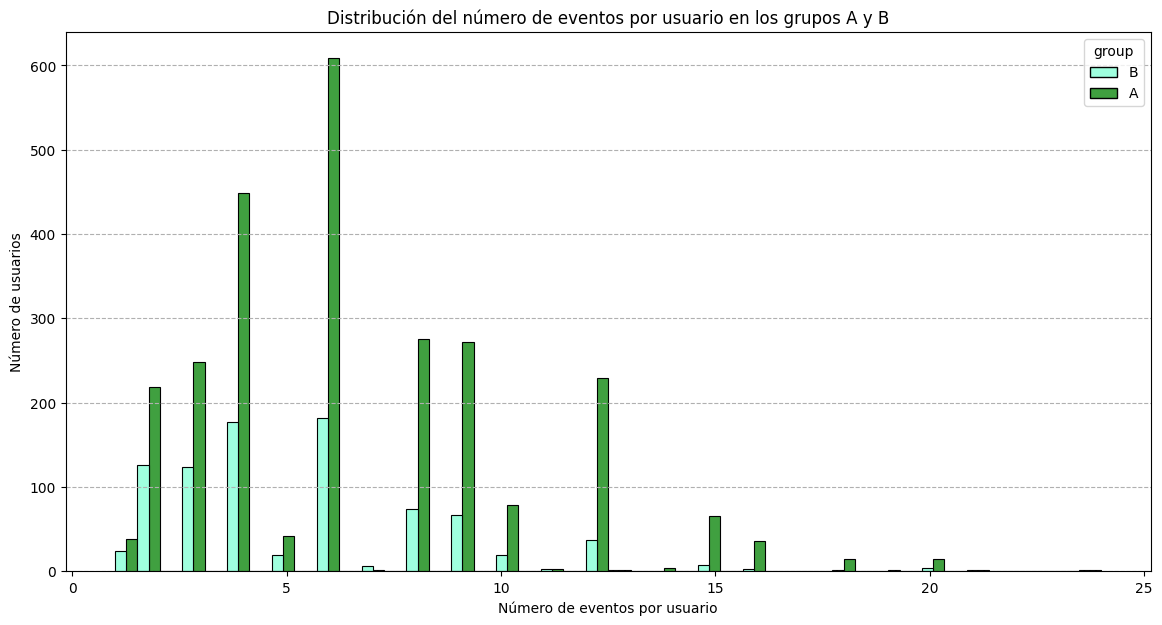

In [35]:
# Realizar un histograma de distribución 

plt.figure(figsize=(14, 7))

sns.histplot(data=events_user, x='event_count', hue='group', multiple='dodge', palette=['aquamarine', 'green'])
plt.title('Distribución del número de eventos por usuario en los grupos A y B')
plt.xlabel('Número de eventos por usuario')
plt.ylabel('Número de usuarios')
plt.grid(axis='y', linestyle='--')

plt.show()

De la gráfica de 'Distribución del número de eventos por usuario en los grupos A y B' se observa lo siguiente:

1. Las barras del grup A (verdes) tienen una frecuencia de usuarios notablemente más alta con menor cantidad de eventos. Por otro labo, las barras del grupo B (aguamarina) presentan una distribución más constante. Esto puede significar que que los usuarios del grupo A aunque eran más, generaron menos eventos en comparación a los del grupo B.

2. En cuanto al tamaño de la muestra, Es muy notable que el número de usuarios del grupo B es menor al número de usuarios de grupo A. Por ejemplo, mientras en el número de eventos por usuario (5), para el grupo A la barra más alta es de más de 600 usuarios, para el grupo B la barrra más alta es de menos de 200 usuarios. 

3. Debido a este análisis, se concluye que las muestras no hay distribución equitativa de eventos por usuario entre las muestras. Esto puede significar un problema en la validez de los resultos porque no se ha aplicado una característica importante en las pruebas A/B y es que ambas muestras deben ser segmentadas de forma equitativa. Las muestras al no ser del mismo tamaño o similar, los resultados no serían estadísticamente significativos.

### **3.3. ¿Hay usuarios que están presentes en ambas muestras?**

In [36]:
# Encontrar los usuarios únicos en cada grupo del DataFrame 'events_14_days'

events_14_days_a = events_14_days[events_14_days['group'] == 'A']['user_id'].unique()

events_14_days_b = events_14_days[events_14_days['group'] == 'B']['user_id'].unique()


In [37]:
# Encontrar los usuarios que están en los dos grupos

users_both_groups = np.intersect1d(events_14_days_a, events_14_days_b)

print(f"Cantidad de usuarios presentes en los dos grupos: {len(users_both_groups)}")


Cantidad de usuarios presentes en los dos grupos: 0


Al tener en DataFrame 'events_14_days' ya con los filtros de region 'EU', nombre de la prueba 'recommender_system_test' y los primeros 14 días desde que los usuarios se registaron, se procedión a encontrar los usuarios únicos de cada grupo events_14_days_a y para el grupo A, events_14_days_b para el grupo B. Luego se realizó una intercción con ambos grupos para encontrar los usuarios duplicados y el resultado obtenido fue 0. Esto quiere decir que no se encontraton usuarios que estuvieran presentes en ambos grupos. El resultado indica que al no haber usuarios duplicados, no hay riesgo de presentar un sesgo en los resultados de la prueba y considerando este análisis de usuarios los resultados pueden ser confiables.

### **3.4. ¿Cómo se distibuye el número de eventos entre los días?**

In [38]:
# Extraer del DataFrame 'events' el días de la semana

events_14_days_copy = events_14_days.copy()

events_14_days_copy['day'] = events_14_days_copy['event_dt'].dt.day_name()

events_14_days_copy['date'] = events_14_days_copy['event_dt'].dt.date

events_14_days_copy.head()

,user_id,first_date,region,device,event_dt,event_name,details,group,ab_test,days_since_register,day,date
0,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07 21:52:10,product_page,NaN,A,recommender_system_test,0,Monday,2020-12-07
1,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07 21:52:07,login,NaN,A,recommender_system_test,0,Monday,2020-12-07
2,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-07 15:32:54,product_page,NaN,B,recommender_system_test,0,Monday,2020-12-07
3,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-08 08:29:31,product_page,NaN,B,recommender_system_test,1,Tuesday,2020-12-08
4,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-10 18:18:27,product_page,NaN,B,recommender_system_test,3,Thursday,2020-12-10


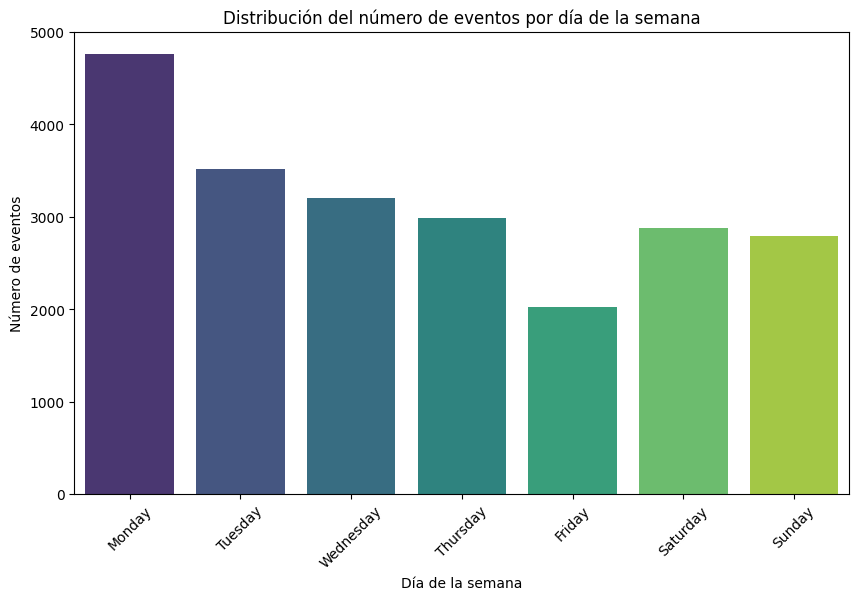

In [39]:
# Agrupar los eventos por los días de la semana
events_day = events_14_days_copy['day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


# Graficar la distribución de eventos por día de la semana
plt.figure(figsize=(10, 6))

sns.barplot(x=events_day.index, y=events_day.values, palette="viridis")
plt.title('Distribución del número de eventos por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número de eventos')
plt.xticks(rotation=45)

plt.show()

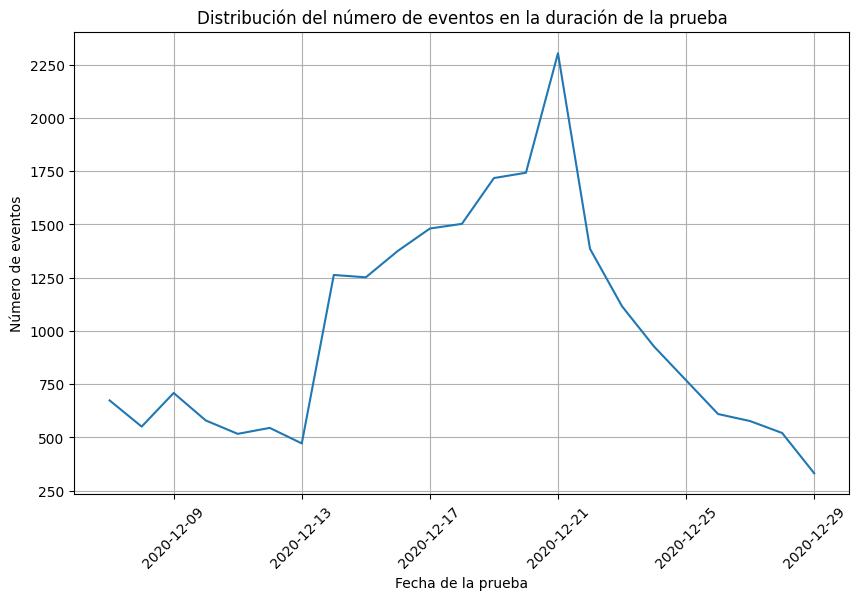

In [40]:
# Agrupar eventos por fecha 
events_week = events_14_days_copy['date'].value_counts().reindex()

# Graficar la distribución de eventos por día de la semana
plt.figure(figsize=(10, 6))

sns.lineplot(x=events_week.index, y=events_week.values, palette="viridis")
plt.title('Distribución del número de eventos en la duración de la prueba')
plt.xlabel('Fecha de la prueba')
plt.ylabel('Número de eventos')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

De la gráfica de barras obtenida 'Distribución del número de eventos por día de la semana', se puede observar que el día en el que más eventos se presentan fue el día lunes, alrederor de 470 eventos. El día viernes presenta 200 eventos, menos de la mitad de los eventos presentados los lunes. Los otros días tienen un comportamiento similar pues oscilan entre el 300 y 340 eventos aproximadamente al día.

Esto quiere decir que el primer días de la semana, es donde más movimientos hay de los usuarios en la tienda en línea y esto influye en los resultados de las pruebas A/B.

De la gráfica 'Distribución del número de eventos en la duración de la prueba' para el día de inicio 2020-12-07 se presentaron 700 eventos, para el día 2020-12-13 disminuye el valor de los eventos a 500 al día. Después se muestra un incremento de los eventos de forma constante hasta el día 2020-12-21 en donde se da el pico con 2300 eventos, luego de este día se presentó una disminución constante hasta el día 2020-12-29 con aproximadamente 300 eventos para este día.

### **3.5. ¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?**

Después de realizar el analisis explorario de los datos, se puede decir que si hay algunas peculiaridades con los datos.

1. Al revisar los valores de conversión entra las etapas, se encontro que de login - product_page, de product_page - product_cart la tasa de conversión disminuye mostrando un comportamiento natural. Sin mebargo, la tasa de conversión de product_page - purchase en lugar de disminuir o mantenerse igual a la etapa anterior aumenta. Es un comportamiento poco común, aunque es probable que muchos usuarios están acostumbrados a realizar la compra sin pasar primero por product_cart.

2. No se encontraron usuarios duplicados, es decir que fueron usuarios que hicieron parte de los grupos A y B. Esto da una confiailidad al resultado porque descarta un posible sesgo de los datos.

3. De la gráfica 'Distribución del número de eventos por usuario en los grupos A y B' se observa que la distribución de eventos mostró que los grupos no son homogéneos en cuanto al número de eventos por usuario. Esto puede sugier un posible sesgo en la forma en que los usuarios fueron segmentados a los grupos.

4. En la gráfica de 'Distribución del número de eventos por día de la semana', se observa que el día en el que se presenta más actividad de los usuarios en la tienda online son los lunes por la cantidad de eventos para este día. La actividad va disminuyendo en los siguientes días, el viernes es el día que menor actividad presentan los usuarios, inclusive menos de la mitad de la actividad reportada para el día lunes. El reporte de los eventos del fin de semana son muy similares a los días mitad los otros días de la semana marte, miércoles y jueves.

## **Paso 4. Evaluar los resultados de la prueba A/B:**

### **4.1. ¿Qué puedes decir sobre los resultados de la prueba A/B?**

El no encontrar ususarios duplicados en los grupos, es decir que uno o varios usuarios participaran de ambas pruebas A y B, hace que la prueba no presente riesgos de datos sesgados, por lo tanto se puede decir que fue una prueb sin contaminación de usuarios en cada grupo.

En cuanto al tamaño de los grupos, es evitente en la gráfica 'Distribución del número de eventos por usuario en los grupos A y B' una gran diferencia en el tamaño de de cada grupo siendo el grupo B notablemente más pequeño que el grupo A, lo cual puede afectar el nivel de significancia de la prueba estadística al no tener suficiente información de uno de los grupos.

Econtrar la tasa de conversión de product_cart a purchase es superior al 100% en ambos grupos es una visión muy importante. Esto puede sugerir que muchos usuarios están comprando directamente sin pasar por la página product_card. Este comportamiento es una peculiaridad que debe ser tenida en cuenta para el diseño de alguna futura prueba. Además se nota en esta conversión que el grupo B tiene una tasa de conversión ligeramente superior, lo que podría indicar que el nuevo sistema (nuevo embudo de pago) ayuda a los usuarios a decidirse por la compra una vez que han añadido un producto al carrito.

### **4.2. Utiliza una prueba z para comprobar la diferencia estadística entre las proporciones.**

In [41]:
# Información de las primera filas del DataFrame para el análisis

events_14_days.head()

,user_id,first_date,region,device,event_dt,event_name,details,group,ab_test,days_since_register
0,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07 21:52:10,product_page,NaN,A,recommender_system_test,0
1,D72A72121175D8BE,2020-12-07,EU,PC,2020-12-07 21:52:07,login,NaN,A,recommender_system_test,0
2,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-07 15:32:54,product_page,NaN,B,recommender_system_test,0
3,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-08 08:29:31,product_page,NaN,B,recommender_system_test,1
4,DD4352CDCF8C3D57,2020-12-07,EU,Android,2020-12-10 18:18:27,product_page,NaN,B,recommender_system_test,3


In [42]:
# Agrupar los usaurios por cada grupo
group_a = events_14_days[events_14_days['group'] == 'A']

group_b = events_14_days[events_14_days['group'] == 'B']

# Número de usuarios que hicieron una compra ('purchase')
purchases_a = group_a[group_a['event_name'] == 'purchase']['user_id'].nunique()
print('Número total de usuarios que compraron del grupo A:', purchases_a)

purchases_b = group_b[group_b['event_name'] == 'purchase']['user_id'].nunique()
print('Número total de usuarios que compraron del grupo B:', purchases_b)


Número total de usuarios que compraron del grupo A: 833
Número total de usuarios que compraron del grupo B: 249


In [43]:
# Número total de usuarios únicos en cada grupo
total_users_a = group_a['user_id'].nunique()
print('Número total del usuarios del grupo A:', total_users_a)

total_users_b = group_b['user_id'].nunique()
print('Número total del usuarios del grupo B:', total_users_b)


Número total del usuarios del grupo A: 2604
Número total del usuarios del grupo B: 877


In [44]:
# Creación de variables con los datos necesarios para la prueba Z
count = [purchases_a, purchases_b]
nobs = [total_users_a, total_users_b]

# Realizar la prueba Z
z_stat, p_value = proportions_ztest(count, nobs)
alpha = 0.05

print(f"Valor de la prueba Z: {z_stat:.4f}")
print(f"Valor p: {p_value:.4f}")
print()
if p_value < alpha:
    print("La diferencia de conversión entre eventos es estadísticamente significativa.")
else:
    print("La diferencia de conversión entre eventos no es estadísticamente significativa.")

Valor de la prueba Z: 1.9906
Valor p: 0.0465

La diferencia de conversión entre eventos es estadísticamente significativa.


Para realizar la prueba estadística Z se estableció un valor de alpha de 0.05, valor de referencia normalmente utilizado para pruebas estadísticas.
El valor p obtenido fue 0.0465 al ser menor al valor alpha 0.05 se puede decir que la diferencia de la conversión entre eventos es estadísticamente significaiva. Además el valor Z de la prueba 1.9906 es un valor grande lo que confirma que la diferencia entre las proporciones de los grupos es importante.


<div class="alert alert-block alert-success">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con el calculo de la z-score y con el desarrollo de la prueba de hipótesis. Además agregas una interpretación al z-score obtenido y al resultado del valor p de la prueba de hipótesis.



## **Paso 5. Describe tus conclusiones con respecto a la etapa EDA y los resultados de la prueba A/B.**

1. En el análisis exploratorio de los datos con respecto a los valores ausentes de la columna 'details' del DataFrame 'events', se encontró que estos valores corresponden a los eventos de login, poduct_page y product_cart. Era de esperarse debido a que esta columna hace refrencia a datos adicionales sobre el evento 'purchase', por lo tanto los valores ausentes no representan problema para la calidad de los datos.
   
2. Se encontró que el número de usuarios en el grupo A es significativamente mayor que en el grupo B. Esta diferencia de usuarios podría afectar la validez de los resultados, debido a que una de las características de una prueba A/B ideal debe tener grupos de tamaño similar porque puede presentar una alteración de la significancia estadística de los datos. Sin embargo, se verificó que no hay usuarios en ambos grupos, esto puede respaldar la validez de la prueba.

3. El grupo B, que usó el nuevo embudo de pago, tiene una tasa de conversión inferior en la primera etapa (login - product_page), lo que indica que menos usuarios están viendo la página del producto. Sin embargo, el grupo B parece tener una mejor tasa de conversión en las etapas posteriores (product_page - product_cart y product_cart - purchase), lo que puede sugerir que el nuevo sistema podría estar funcionando una vez el usuario ya está en la página del producto.

4. De los resultados obtenidos en la nueva prueba A/B desarrollada en este proyecto, se puede concluir que al obtener una diferencia estadísticamente significativa entre las proporciones de conversión de los grupos hay una impacto representantivo en los resultados del grupo B, al parecer el nuevo sistema de recomendaciones está influyendo en el comportamiento de los usuarios de una manera no esperada. Por lo tanto se recomienda implementar los cambios del grupo B en la plataforma.